🚀 نظام استرجاع المعلومات العربي - مجموعتي تدريب واختبار
📥 جاري تحميل بيانات التدريب...
📁 Loaded train dataset: 8437 rows
📊 Columns: ['dialect', 'sarcasm', 'sentiment', 'original_sentiment', 'tweet', 'source']
⚠️  لا توجد مستندات تدريب، جاري استخدام بيانات نموذجية...
✅ تم تحميل 15 مستند تدريب
📥 جاري تحميل بيانات الاختبار...
📁 Loaded test dataset: 2110 rows
📊 Columns: ['dialect', 'sarcasm', 'sentiment', 'original_sentiment', 'tweet', 'source']
⚠️  لا توجد استعلامات اختبار، جاري إنشاء استعلامات تلقائية...
⚠️  لا توجد تقييمات صلة، جاري إنشاء تقييمات تلقائية...
✅ تم تحميل 8 استعلام اختبار
✅ تم تحميل تقييمات الصلة لـ 8 استعلام

🔨 جاري بناء نظام استرجاع المعلومات...
📚 Built index with 100 unique terms
✅ BM25 model trained on 15 documents
✅ تم بناء النظام بنجاح

🧪 جاري التقييم الشامل على بيانات الاختبار...
📊 جاري تقييم Boolean...
📊 جاري تقييم BM25...
📊 جاري تقييم BM25+Expansion...

📈 جاري إنشاء الرسوم البيانية...


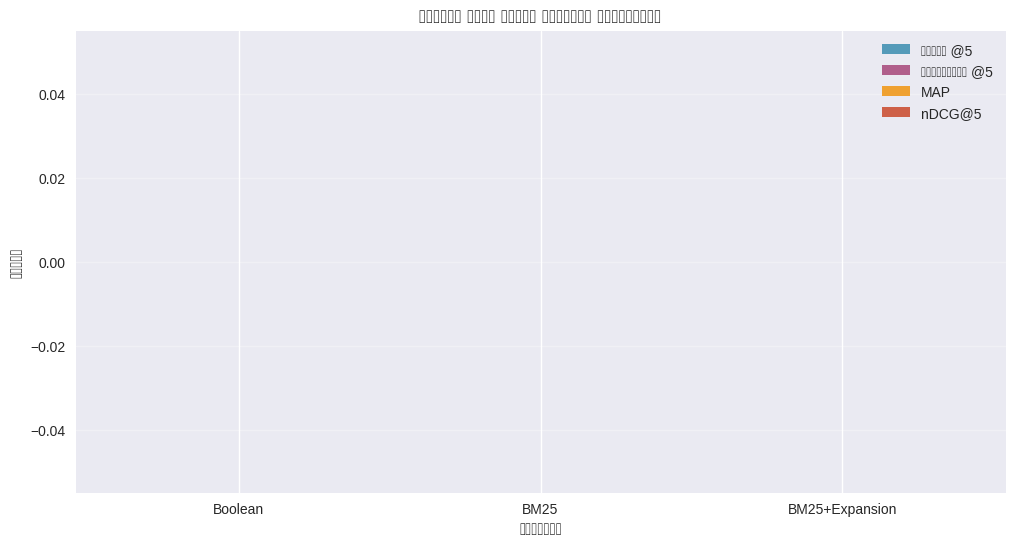

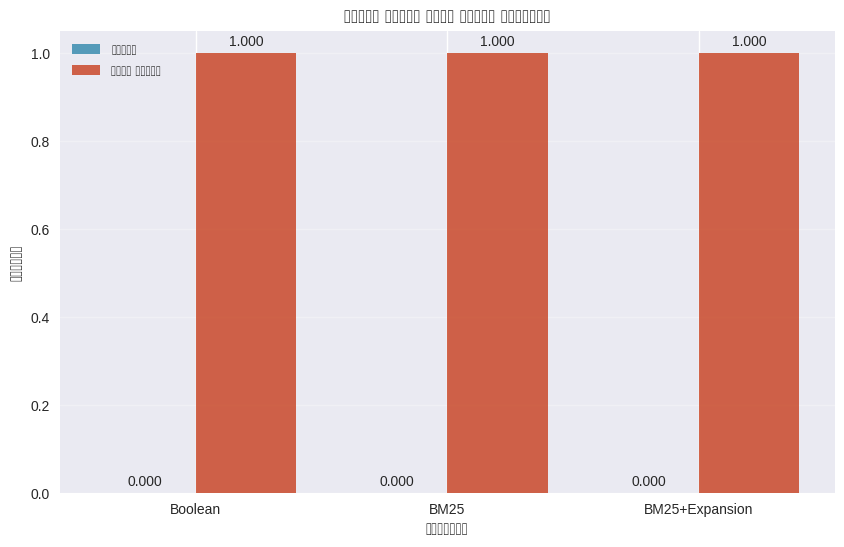

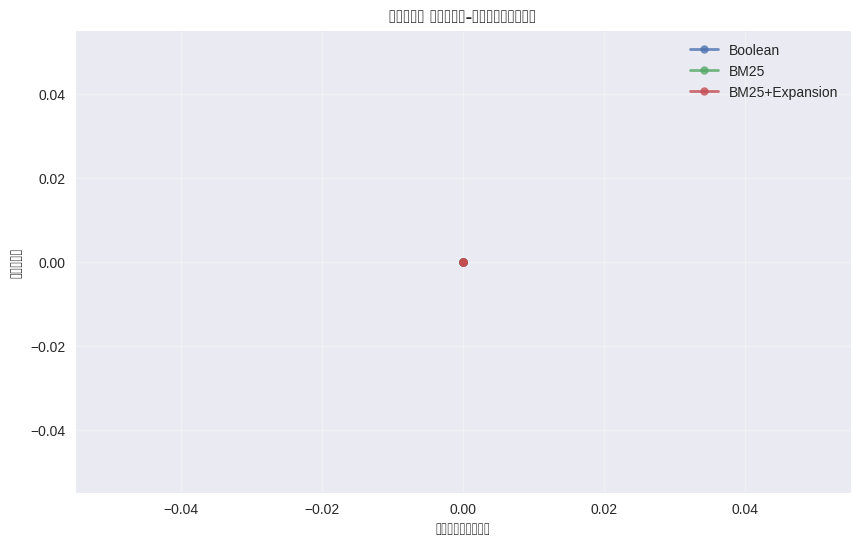

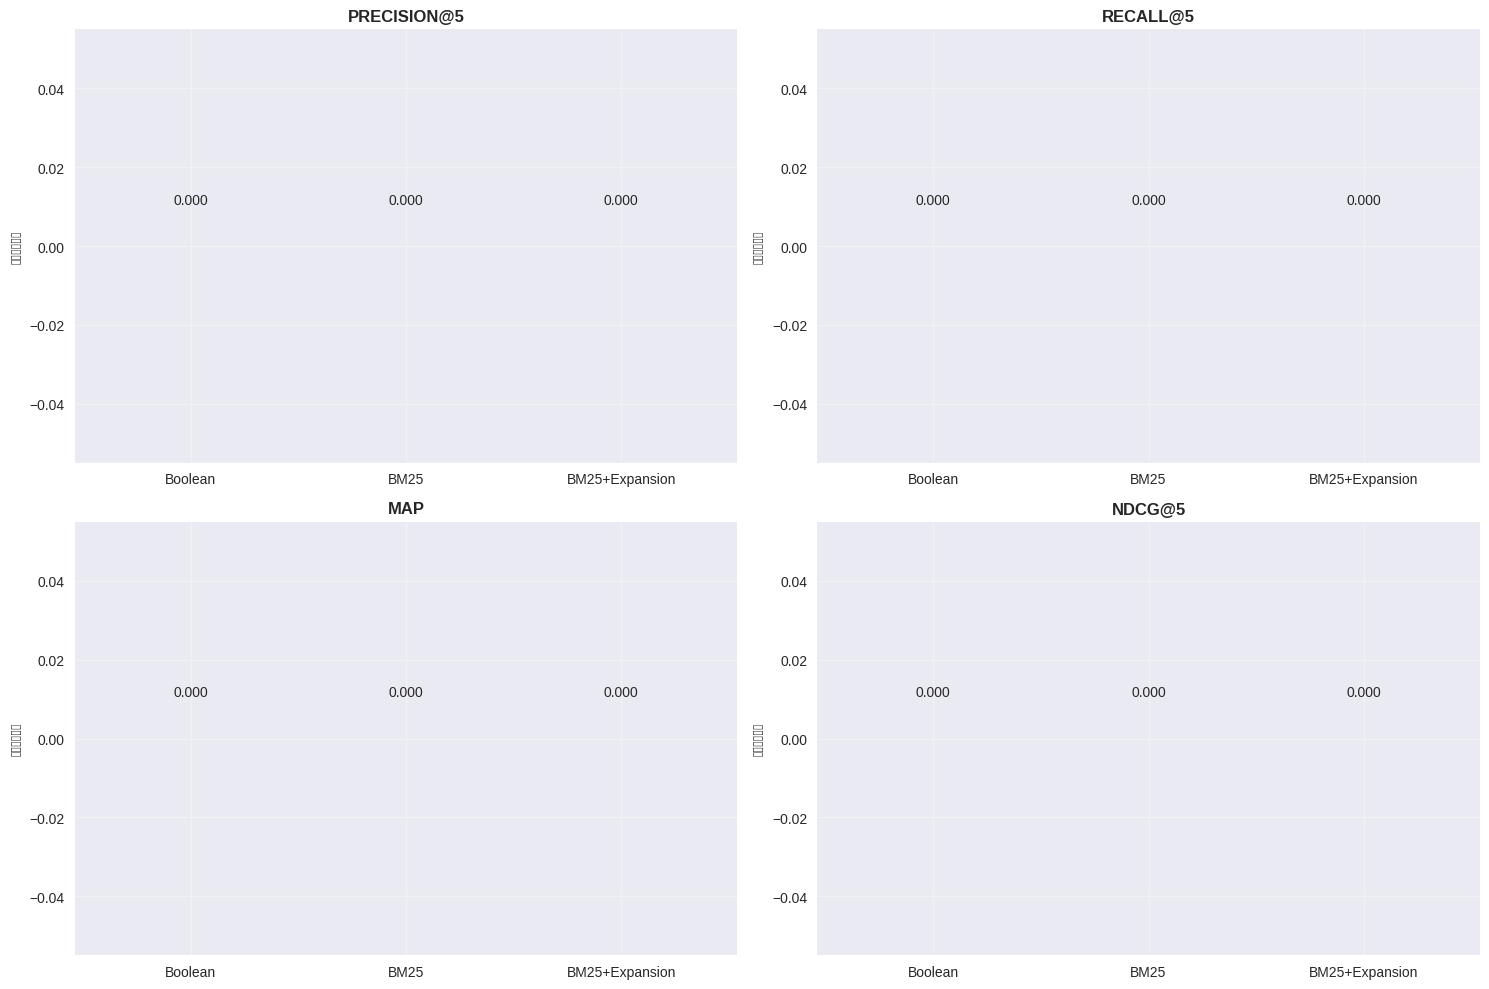


نتائج التقييم الشامل

📋 Boolean:
   📊 الدقة (P@1):    0.0000
   📊 الدقة (P@5):    0.0000
   📊 الاسترجاع (R@5): 0.0000
   📊 MAP:           0.0000
   📊 nDCG@5:        0.0000
   ❌ نسبة الخطأ:    1.0000
   ❌ يحتاج تحسين

📋 BM25:
   📊 الدقة (P@1):    0.0000
   📊 الدقة (P@5):    0.0000
   📊 الاسترجاع (R@5): 0.0000
   📊 MAP:           0.0000
   📊 nDCG@5:        0.0000
   ❌ نسبة الخطأ:    1.0000
   ❌ يحتاج تحسين

📋 BM25+Expansion:
   📊 الدقة (P@1):    0.0000
   📊 الدقة (P@5):    0.0000
   📊 الاسترجاع (R@5): 0.0000
   📊 MAP:           0.0000
   📊 nDCG@5:        0.0000
   ❌ نسبة الخطأ:    1.0000
   ❌ يحتاج تحسين

بحث تفاعلي - نظام استرجاع المعلومات العربي
اكتب استعلامك بالعربية (أو 'exit' للخروج):

🔍 الاستعلام: الرياض 

----------------------------------------
نتائج البحث عن: 'الرياض'
----------------------------------------

🔎 البحث البولياني (3 نتيجة):
  1. doc1: الطقس في الرياض حار وجاف في الصيف ومعتدل في الشتاء مع هطول الأمطار أحياناً
  2. doc2: الرياضة في المملكة العربية السعودية تشمل كرة 

In [7]:
# -*- coding: utf-8 -*-
"""Arabic Information Retrieval System - Training and Testing Datasets"""

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import math
import json
from typing import List, Dict, Tuple
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os
import warnings
warnings.filterwarnings('ignore')

# ==================== DATA PREPROCESSING ====================

class ArabicTextPreprocessor:
    """Arabic text preprocessing and normalization"""

    def __init__(self):
        # Arabic stop words
        self.stop_words = set([
            'في', 'من', 'إلى', 'على', 'أن', 'ما', 'هذا', 'هذه', 'كان', 'يكون',
            'ذلك', 'كل', 'مع', 'هو', 'هي', 'هم', 'أن', 'أو', 'لا', 'ب', 'ك', 'ل',
            'و', 'فى', 'عن', 'مع', 'اذا', 'إن', 'قد', 'لا', 'لم', 'لكن', 'بال',
            'بين', 'حتى', 'حيث', 'ذلك', 'هناك', 'هنا', 'منذ', 'ضد', 'فقط', 'عن',
            'كل', 'مع', 'هو', 'هي', 'كانت', 'يكون', 'تكون', 'ليس', 'لا', 'نعم',
            'اذا', 'لكن', 'أم', 'أي', 'ما', 'متى', 'أين', 'كيف', 'لماذا'
        ])

    def normalize_text(self, text: str) -> str:
        """Normalize Arabic text"""
        if not isinstance(text, str):
            return ""

        # Remove diacritics (tashkeel)
        text = re.sub(r'[\u064b-\u0652]', '', text)

        # Normalize Alef variations
        text = re.sub(r'[إأآا]', 'ا', text)

        # Normalize Teh Marbuta and Heh
        text = re.sub(r'[ة]', 'ه', text)
        text = re.sub(r'[ى]', 'ي', text)

        # Remove extra spaces and special characters
        text = re.sub(r'[^\w\s]', ' ', text)
        text = re.sub(r'\s+', ' ', text)

        return text.strip()

    def tokenize(self, text: str) -> List[str]:
        """Tokenize Arabic text"""
        text = self.normalize_text(text)
        tokens = text.split()
        # Remove stop words and short tokens
        tokens = [token for token in tokens if token not in self.stop_words and len(token) > 2]
        return tokens

    def light_stem(self, token: str) -> str:
        """Light stemming for Arabic words"""
        # Remove common prefixes
        prefixes = ['وال', 'بال', 'ال', 'و', 'ب', 'ك', 'ل', 'ف', 'س', 'ي']
        for prefix in prefixes:
            if token.startswith(prefix):
                token = token[len(prefix):]
                break

        # Remove common suffixes
        suffixes = ['ون', 'ين', 'ان', 'ات', 'ة', 'ه', 'ي', 'ك']
        for suffix in suffixes:
            if token.endswith(suffix):
                token = token[:-len(suffix)]
                break

        return token

# ==================== DATASET PROCESSOR ====================

class DatasetProcessor:
    """Process training and testing datasets for Arabic IR system"""

    def __init__(self):
        self.preprocessor = ArabicTextPreprocessor()

    def load_dataset(self, file_path: str, dataset_type: str = "train") -> Dict:
        """
        Load dataset from CSV file

        Args:
            file_path: Path to the CSV file
            dataset_type: "train" or "test"

        Returns:
            Dictionary containing documents, queries, and relevance judgments
        """
        try:
            df = pd.read_csv(file_path)
            print(f"📁 Loaded {dataset_type} dataset: {len(df)} rows")
            print(f"📊 Columns: {list(df.columns)}")

            result = {
                'documents': {},
                'queries': {},
                'relevance_judgments': {},
                'relevance_scores': {}
            }

            # Auto-detect column types based on common names
            doc_id_col = None
            text_col = None
            query_id_col = None
            query_text_col = None
            relevance_col = None

            for col in df.columns:
                col_lower = col.lower()
                if 'doc' in col_lower and 'id' in col_lower:
                    doc_id_col = col
                elif 'text' in col_lower or 'content' in col_lower or 'نص' in col_lower:
                    text_col = col
                elif 'query' in col_lower and 'id' in col_lower:
                    query_id_col = col
                elif 'query' in col_lower or 'استعلام' in col_lower:
                    query_text_col = col
                elif 'relev' in col_lower or 'صلة' in col_lower or 'score' in col_lower:
                    relevance_col = col

            # Process based on dataset type
            if dataset_type == "train":
                # Training dataset - mainly documents
                if doc_id_col and text_col:
                    for _, row in df.iterrows():
                        doc_id = str(row[doc_id_col])
                        text = str(row[text_col])
                        result['documents'][doc_id] = text
                    print(f"✅ Loaded {len(result['documents'])} training documents")

                # If there are queries in training data, load them too
                if query_id_col and query_text_col:
                    for _, row in df.iterrows():
                        if pd.notna(row.get(query_id_col)) and pd.notna(row.get(query_text_col)):
                            query_id = str(row[query_id_col])
                            query_text = str(row[query_text_col])
                            result['queries'][query_id] = query_text
                    print(f"✅ Loaded {len(result['queries'])} training queries")

            elif dataset_type == "test":
                # Testing dataset - mainly queries and relevance judgments
                if query_id_col and query_text_col:
                    for _, row in df.iterrows():
                        query_id = str(row[query_id_col])
                        query_text = str(row[query_text_col])
                        result['queries'][query_id] = query_text
                    print(f"✅ Loaded {len(result['queries'])} test queries")

                # Process relevance judgments
                if relevance_col and doc_id_col:
                    for _, row in df.iterrows():
                        query_id = str(row[query_id_col])
                        doc_id = str(row[doc_id_col])
                        relevance_score = float(row[relevance_col]) if relevance_col else 1.0

                        if query_id not in result['relevance_judgments']:
                            result['relevance_judgments'][query_id] = []
                            result['relevance_scores'][query_id] = {}

                        result['relevance_judgments'][query_id].append(doc_id)
                        result['relevance_scores'][query_id][doc_id] = relevance_score
                    print(f"✅ Loaded relevance judgments for {len(result['relevance_judgments'])} queries")

            return result

        except Exception as e:
            print(f"❌ Error loading {dataset_type} dataset: {e}")
            return {}

    def create_sample_queries_from_documents(self, documents: Dict[str, str], num_queries: int = 5) -> Dict[str, str]:
        """Create sample queries based on document content for testing"""
        queries = {}

        # Extract key terms from documents
        all_text = ' '.join(documents.values())
        tokens = self.preprocessor.tokenize(all_text)

        # Get most common terms
        common_terms = Counter(tokens).most_common(30)

        # Create queries using common terms
        query_templates = [
            "ما هو {term1}",
            "بحث عن {term1} و {term2}",
            "معلومات عن {term1}",
            "ما هي {term1}",
            "شرح {term1} في {term2}",
            "تعريف {term1}",
            "أهمية {term1}",
            "تأثير {term1} على {term2}",
            "مزايا {term1}",
            "أنواع {term1}"
        ]

        for i in range(min(num_queries, len(query_templates))):
            term1 = common_terms[i * 2 % len(common_terms)][0] if common_terms else "موضوع"
            term2 = common_terms[(i * 2 + 1) % len(common_terms)][0] if len(common_terms) > 1 else "مجال"

            query = query_templates[i].format(term1=term1, term2=term2)
            queries[f"test_q{i+1}"] = query

        return queries

    def create_automatic_relevance(self, documents: Dict[str, str], queries: Dict[str, str]) -> Tuple[Dict, Dict]:
        """Create automatic relevance judgments based on content similarity"""
        relevance_judgments = {}
        relevance_scores = {}

        for query_id, query_text in queries.items():
            relevant_docs = []
            scores_dict = {}

            query_tokens = set(self.preprocessor.tokenize(query_text))

            for doc_id, doc_text in documents.items():
                doc_tokens = set(self.preprocessor.tokenize(doc_text))

                # Calculate Jaccard similarity
                intersection = query_tokens.intersection(doc_tokens)
                union = query_tokens.union(doc_tokens)

                if union:
                    similarity = len(intersection) / len(union)
                else:
                    similarity = 0

                # Consider document relevant if similarity > threshold
                if similarity > 0.15:  # Adjustable threshold
                    relevant_docs.append(doc_id)
                    scores_dict[doc_id] = min(3, int(similarity * 10))  # Scale to 0-3

            relevance_judgments[query_id] = relevant_docs
            relevance_scores[query_id] = scores_dict

        return relevance_judgments, relevance_scores

# ==================== INDEXING & BOOLEAN RETRIEVAL ====================

class InvertedIndex:
    """Inverted index for Boolean retrieval"""

    def __init__(self):
        self.index = defaultdict(list)
        self.doc_length = {}
        self.doc_count = 0

    def build_index(self, documents: Dict[str, str], preprocessor: ArabicTextPreprocessor):
        """Build inverted index from documents"""
        self.index.clear()

        for doc_id, text in documents.items():
            tokens = preprocessor.tokenize(text)
            stemmed_tokens = [preprocessor.light_stem(token) for token in tokens]

            # Count term frequencies
            term_freq = Counter(stemmed_tokens)
            self.doc_length[doc_id] = len(stemmed_tokens)

            # Add to index
            for term, freq in term_freq.items():
                self.index[term].append((doc_id, freq))

        self.doc_count = len(documents)
        print(f"📚 Built index with {len(self.index)} unique terms")

    def boolean_search(self, query: str, preprocessor: ArabicTextPreprocessor) -> List[str]:
        """Boolean search implementation"""
        tokens = preprocessor.tokenize(query)
        stemmed_tokens = [preprocessor.light_stem(token) for token in tokens]

        result_docs = set()

        if stemmed_tokens:
            # Simple AND operation
            first_term = stemmed_tokens[0]
            if first_term in self.index:
                result_docs = set(doc_id for doc_id, _ in self.index[first_term])

            for term in stemmed_tokens[1:]:
                if term in self.index:
                    term_docs = set(doc_id for doc_id, _ in self.index[term])
                    result_docs = result_docs.intersection(term_docs)
                else:
                    return []

        return list(result_docs)

# ==================== RANKED RETRIEVAL (BM25) ====================

class BM25:
    """BM25 ranking algorithm"""

    def __init__(self, k1=1.5, b=0.75):
        self.k1 = k1
        self.b = b
        self.index = None
        self.doc_length = None
        self.avg_doc_length = 0
        self.doc_count = 0
        self.idf = {}

    def fit(self, index: InvertedIndex):
        """Fit BM25 model to the index"""
        self.index = index.index
        self.doc_length = index.doc_length
        self.doc_count = index.doc_count
        self.avg_doc_length = sum(self.doc_length.values()) / self.doc_count

        # Calculate IDF for each term
        for term, postings in self.index.items():
            doc_freq = len(postings)
            self.idf[term] = math.log((self.doc_count - doc_freq + 0.5) / (doc_freq + 0.5) + 1.0)

        print(f"✅ BM25 model trained on {self.doc_count} documents")

    def search(self, query: str, preprocessor: ArabicTextPreprocessor, top_k=10) -> List[Tuple[str, float]]:
        """Search and rank documents using BM25"""
        tokens = preprocessor.tokenize(query)
        stemmed_tokens = [preprocessor.light_stem(token) for token in tokens]

        scores = defaultdict(float)

        for term in stemmed_tokens:
            if term in self.index:
                idf = self.idf[term]
                for doc_id, tf in self.index[term]:
                    doc_len = self.doc_length[doc_id]
                    # BM25 scoring formula
                    numerator = tf * (self.k1 + 1)
                    denominator = tf + self.k1 * (1 - self.b + self.b * doc_len / self.avg_doc_length)
                    scores[doc_id] += idf * numerator / denominator

        # Sort by score and return top_k
        sorted_docs = sorted(scores.items(), key=lambda x: x[1], reverse=True)
        return sorted_docs[:top_k]

# ==================== QUERY EXPANSION ====================

class QueryExpansion:
    """Query expansion using semantic similarity"""

    def __init__(self):
        # Enhanced semantic similarity dictionary
        self.similar_words = {
            'طقس': ['جو', 'مناخ', 'حالة', 'أجواء', 'أمطار', 'حرارة', 'برودة'],
            'رياضة': ['رياضي', 'نادي', 'مباراة', 'لاعب', 'فريق', 'منافسة', 'تدريب'],
            'سياسة': ['سياسي', 'حكومة', 'رئيس', 'وزير', 'برلمان', 'قانون', 'دبلوماسية'],
            'اقتصاد': ['اقتصادي', 'مال', 'تجارة', 'سوق', 'استثمار', 'تنمية', 'ميزانية'],
            'تعليم': ['مدرسة', 'طلاب', 'معلم', 'منهج', 'جامعة', 'دراسة', 'تعلم'],
            'صحة': ['طبيب', 'مستشفى', 'علاج', 'مرض', 'دواء', 'وقاية', 'علا ج'],
            'تكنولوجيا': ['تقنية', 'كمبيوتر', 'هاتف', 'إنترنت', 'برمجة', 'ذكاء', 'اصطناعي'],
            'عمل': ['وظيفة', 'شغل', 'مهنة', 'توظيف', 'عمل', 'وظائف', 'مهني'],
            'سفر': ['سفر', 'رحلة', 'سياحة', 'بلد', 'مكان', 'سياحي', 'سائح'],
            'طعام': ['أكل', 'مطبخ', 'وجبة', 'طبخ', 'مذاق', 'غذاء', 'طعام'],
            'ثقافة': ['أدب', 'فن', 'تراث', 'عادات', 'تقاليد', 'إبداع', 'معرفة'],
            'علوم': ['علم', 'بحث', 'تجربة', 'نظرية', 'اكتشاف', 'معرفة', 'دراسة']
        }

    def expand_query(self, query: str, preprocessor: ArabicTextPreprocessor) -> str:
        """Expand query with similar terms"""
        tokens = preprocessor.tokenize(query)
        expanded_terms = []

        for token in tokens:
            expanded_terms.append(token)
            stemmed = preprocessor.light_stem(token)
            if stemmed in self.similar_words:
                # Add 2-3 similar words
                expanded_terms.extend(self.similar_words[stemmed][:3])

        return ' '.join(list(set(expanded_terms)))  # Remove duplicates

# ==================== EVALUATION METRICS ====================

class EvaluationMetrics:
    """Information retrieval evaluation metrics"""

    @staticmethod
    def precision_at_k(retrieved_docs: List[str], relevant_docs: List[str], k: int) -> float:
        """Calculate Precision@k"""
        if k == 0:
            return 0.0
        retrieved_at_k = retrieved_docs[:k]
        relevant_retrieved = set(retrieved_at_k).intersection(set(relevant_docs))
        return len(relevant_retrieved) / k

    @staticmethod
    def recall_at_k(retrieved_docs: List[str], relevant_docs: List[str], k: int) -> float:
        """Calculate Recall@k"""
        if not relevant_docs:
            return 0.0
        retrieved_at_k = retrieved_docs[:k]
        relevant_retrieved = set(retrieved_at_k).intersection(set(relevant_docs))
        return len(relevant_retrieved) / len(relevant_docs)

    @staticmethod
    def average_precision(retrieved_docs: List[str], relevant_docs: List[str]) -> float:
        """Calculate Average Precision"""
        if not relevant_docs:
            return 0.0

        relevant_set = set(relevant_docs)
        precision_sum = 0.0
        num_relevant = 0

        for i, doc in enumerate(retrieved_docs):
            if doc in relevant_set:
                num_relevant += 1
                precision_sum += num_relevant / (i + 1)

        return precision_sum / len(relevant_docs) if relevant_docs else 0.0

    @staticmethod
    def ndcg_at_k(retrieved_docs: List[str], relevance_scores: Dict[str, int], k: int) -> float:
        """Calculate nDCG@k"""
        if k == 0:
            return 0.0

        # Get relevance scores for retrieved documents
        dcg = 0.0
        for i, doc in enumerate(retrieved_docs[:k]):
            rel = relevance_scores.get(doc, 0)
            if i == 0:
                dcg += rel
            else:
                dcg += rel / math.log2(i + 2)  # i+2 because index starts at 0 but position starts at 1

        # Ideal DCG
        ideal_relevance = sorted(relevance_scores.values(), reverse=True)[:k]
        idcg = sum(rel / math.log2(i + 2) if i > 0 else rel
                  for i, rel in enumerate(ideal_relevance))

        return dcg / idcg if idcg > 0 else 0.0

# ==================== VISUALIZATION ====================

class ResultsVisualizer:
    """Visualize IR evaluation results"""

    def __init__(self):
        plt.style.use('seaborn-v0_8')
        self.colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#3E92CC']

    def plot_metrics_comparison(self, metrics_data: Dict, save_path: str = None):
        """Plot bar chart comparing different metrics across models"""
        metrics_names = list(metrics_data.keys())
        model_names = list(next(iter(metrics_data.values())).keys())

        x = np.arange(len(model_names))
        width = 0.8 / len(metrics_names)

        plt.figure(figsize=(12, 6))

        for i, (metric_name, model_scores) in enumerate(metrics_data.items()):
            scores = [model_scores[model] for model in model_names]
            plt.bar(x + i * width, scores, width, label=metric_name,
                   color=self.colors[i % len(self.colors)], alpha=0.8)

        plt.xlabel('النماذج', fontsize=12, fontweight='bold')
        plt.ylabel('القيم', fontsize=12, fontweight='bold')
        plt.title('مقارنة أداء نماذج استرجاع المعلومات', fontsize=14, fontweight='bold')
        plt.xticks(x + width * (len(metrics_names) - 1) / 2, model_names)
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_error_analysis(self, error_rates: Dict, save_path: str = None):
        """Plot error rates and accuracy"""
        models = list(error_rates.keys())
        accuracy = [1 - error_rates[model] for model in models]
        error = [error_rates[model] for model in models]

        x = np.arange(len(models))

        plt.figure(figsize=(10, 6))
        bars1 = plt.bar(x - 0.2, accuracy, 0.4, label='الدقة', color='#2E86AB', alpha=0.8)
        bars2 = plt.bar(x + 0.2, error, 0.4, label='نسبة الخطأ', color='#C73E1D', alpha=0.8)

        plt.xlabel('النماذج', fontsize=12, fontweight='bold')
        plt.ylabel('النسبة', fontsize=12, fontweight='bold')
        plt.title('الدقة مقابل نسبة الخطأ للنماذج', fontsize=14, fontweight='bold')
        plt.xticks(x, models)
        plt.legend()
        plt.grid(True, alpha=0.3, axis='y')

        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')

        for bar in bars2:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_precision_recall_curve(self, results_dict: Dict, save_path: str = None):
        """Plot precision-recall curve for different models"""
        plt.figure(figsize=(10, 6))

        k_values = [1, 3, 5, 10]

        for model_name, metrics in results_dict.items():
            precision_values = []
            recall_values = []

            for k in k_values:
                precision_values.append(metrics.get(f'precision@{k}', 0))
                recall_values.append(metrics.get(f'recall@{k}', 0))

            plt.plot(recall_values, precision_values, marker='o', linewidth=2,
                    label=model_name, markersize=6, alpha=0.8)

        plt.xlabel('الاسترجاع', fontsize=12, fontweight='bold')
        plt.ylabel('الدقة', fontsize=12, fontweight='bold')
        plt.title('منحنى الدقة-الاسترجاع', fontsize=14, fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)

        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

    def plot_model_performance(self, results: Dict, save_path: str = None):
        """Plot comprehensive model performance comparison"""
        models = list(results.keys())
        metrics = ['precision@5', 'recall@5', 'map', 'ndcg@5']

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()

        for i, metric in enumerate(metrics):
            values = [results[model][metric] for model in models]
            axes[i].bar(models, values, color=self.colors, alpha=0.8)
            axes[i].set_title(f'{metric.upper()}', fontweight='bold')
            axes[i].set_ylabel('القيمة')
            axes[i].grid(True, alpha=0.3)

            # Add value labels
            for j, v in enumerate(values):
                axes[i].text(j, v + 0.01, f'{v:.3f}', ha='center', va='bottom')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.show()

# ==================== MAIN IR SYSTEM ====================

class ArabicIRSystem:
    """Complete Arabic Information Retrieval System with Train/Test datasets"""

    def __init__(self):
        self.preprocessor = ArabicTextPreprocessor()
        self.dataset_processor = DatasetProcessor()
        self.index = InvertedIndex()
        self.bm25 = BM25()
        self.query_expander = QueryExpansion()
        self.evaluator = EvaluationMetrics()
        self.visualizer = ResultsVisualizer()

        self.train_documents = {}
        self.test_queries = {}
        self.test_relevance_judgments = {}
        self.test_relevance_scores = {}

    def load_training_data(self, file_path: str):
        """Load training dataset"""
        print("📥 جاري تحميل بيانات التدريب...")
        training_data = self.dataset_processor.load_dataset(file_path, "train")
        self.train_documents = training_data.get('documents', {})

        if not self.train_documents:
            print("⚠️  لا توجد مستندات تدريب، جاري استخدام بيانات نموذجية...")
            self._load_sample_training_data()

        print(f"✅ تم تحميل {len(self.train_documents)} مستند تدريب")

    def load_testing_data(self, file_path: str):
        """Load testing dataset"""
        print("📥 جاري تحميل بيانات الاختبار...")
        testing_data = self.dataset_processor.load_dataset(file_path, "test")

        self.test_queries = testing_data.get('queries', {})
        self.test_relevance_judgments = testing_data.get('relevance_judgments', {})
        self.test_relevance_scores = testing_data.get('relevance_scores', {})

        # If no test queries, create some from training documents
        if not self.test_queries:
            print("⚠️  لا توجد استعلامات اختبار، جاري إنشاء استعلامات تلقائية...")
            self.test_queries = self.dataset_processor.create_sample_queries_from_documents(
                self.train_documents, num_queries=8
            )

        # If no relevance judgments, create automatic ones
        if not self.test_relevance_judgments:
            print("⚠️  لا توجد تقييمات صلة، جاري إنشاء تقييمات تلقائية...")
            self.test_relevance_judgments, self.test_relevance_scores = \
                self.dataset_processor.create_automatic_relevance(
                    self.train_documents, self.test_queries
                )

        print(f"✅ تم تحميل {len(self.test_queries)} استعلام اختبار")
        print(f"✅ تم تحميل تقييمات الصلة لـ {len(self.test_relevance_judgments)} استعلام")

    def _load_sample_training_data(self):
        """Load sample training data if no file provided"""
        self.train_documents = {
            'doc1': 'الطقس في الرياض حار وجاف في الصيف ومعتدل في الشتاء مع هطول الأمطار أحياناً',
            'doc2': 'الرياضة في المملكة العربية السعودية تشمل كرة القدم والسباحة والفروسية',
            'doc3': 'السياسة الخارجية للمملكة تركز على التعاون الدولي والعلاقات الدبلوماسية',
            'doc4': 'الاقتصاد السعودي يعتمد على النفط مع توجه للتنوع في رؤية 2030',
            'doc5': 'التعليم في السعودية يشهد تطوراً كبيراً في المناهج والجامعات',
            'doc6': 'الصحة في المملكة تقدم خدمات طبية متطورة عبر المستشفيات والمراكز',
            'doc7': 'التكنولوجيا والذكاء الاصطناعي يحظيان باهتمام كبير في الخطط المستقبلية',
            'doc8': 'الطقس في جدة حار ورطب معظم أيام السنة مع هطول الأمطار في الشتاء',
            'doc9': 'كرة القدم هي الرياضة الأكثر شعبية في المملكة العربية السعودية',
            'doc10': 'السياسة الداخلية تركز على التنمية المستدامة وتحسين الخدمات',
            'doc11': 'السياحة في السعودية تشهد نمواً كبيراً خاصة بعد فتح المجال للسياحة',
            'doc12': 'الثقافة العربية غنية بالأدب والشعر والفنون التقليدية',
            'doc13': 'العلوم والتقنية في تطور مستمر في العالم العربي',
            'doc14': 'البيئة والاستدامة من المواضيع المهمة في الوقت الحالي',
            'doc15': 'التجارة الإلكترونية تنمو بسرعة في الشرق الأوسط'
        }

    def build_system(self):
        """Build the complete IR system using training data"""
        print("\n🔨 جاري بناء نظام استرجاع المعلومات...")

        if not self.train_documents:
            print("❌ لا توجد بيانات تدريب لبناء النظام")
            return False

        # Build inverted index
        self.index.build_index(self.train_documents, self.preprocessor)

        # Build BM25 model
        self.bm25.fit(self.index)

        print("✅ تم بناء النظام بنجاح")
        return True

    def evaluate_model(self, model_name: str, retrieval_function, use_expansion=False):
        """Evaluate a specific retrieval model on test data"""
        precision_scores = {1: [], 3: [], 5: [], 10: []}
        recall_scores = {1: [], 3: [], 5: [], 10: []}
        map_scores = []
        ndcg_scores = {5: [], 10: []}

        for query_id, query_text in self.test_queries.items():
            # Apply query expansion if requested
            if use_expansion:
                processed_query = self.query_expander.expand_query(query_text, self.preprocessor)
            else:
                processed_query = query_text

            # Retrieve documents
            retrieved_docs_with_scores = retrieval_function(processed_query)
            retrieved_docs = [doc_id for doc_id, score in retrieved_docs_with_scores]

            # Get relevant documents for this query
            relevant_docs = self.test_relevance_judgments.get(query_id, [])
            relevance_scores = self.test_relevance_scores.get(query_id, {})

            # Calculate metrics for different k values
            for k in [1, 3, 5, 10]:
                precision_at_k = self.evaluator.precision_at_k(retrieved_docs, relevant_docs, k)
                recall_at_k = self.evaluator.recall_at_k(retrieved_docs, relevant_docs, k)
                precision_scores[k].append(precision_at_k)
                recall_scores[k].append(recall_at_k)

            # Calculate MAP and nDCG
            avg_precision = self.evaluator.average_precision(retrieved_docs, relevant_docs)
            map_scores.append(avg_precision)

            for k in [5, 10]:
                ndcg_at_k = self.evaluator.ndcg_at_k(retrieved_docs, relevance_scores, k)
                ndcg_scores[k].append(ndcg_at_k)

        # Aggregate results
        results = {}
        for k in [1, 3, 5, 10]:
            results[f'precision@{k}'] = np.mean(precision_scores[k])
            results[f'recall@{k}'] = np.mean(recall_scores[k])

        results['map'] = np.mean(map_scores)
        results['ndcg@5'] = np.mean(ndcg_scores[5])
        results['ndcg@10'] = np.mean(ndcg_scores[10])
        results['error_rate'] = 1 - results['precision@5']  # Simple error rate

        return results

    def run_complete_evaluation(self):
        """Run comprehensive evaluation of all models on test data"""
        print("\n🧪 جاري التقييم الشامل على بيانات الاختبار...")

        if not self.test_queries:
            print("❌ لا توجد بيانات اختبار للتقييم")
            return {}

        # Define retrieval functions for different models
        def boolean_retrieval(query):
            doc_ids = self.index.boolean_search(query, self.preprocessor)
            # Convert to same format as BM25 (with dummy scores)
            return [(doc_id, 1.0) for doc_id in doc_ids]

        def bm25_retrieval(query):
            return self.bm25.search(query, self.preprocessor, top_k=10)

        def bm25_expanded_retrieval(query):
            expanded_query = self.query_expander.expand_query(query, self.preprocessor)
            return self.bm25.search(expanded_query, self.preprocessor, top_k=10)

        # Evaluate all models
        models = {
            'Boolean': boolean_retrieval,
            'BM25': bm25_retrieval,
            'BM25+Expansion': bm25_expanded_retrieval,
        }

        results = {}
        error_rates = {}

        for model_name, retrieval_func in models.items():
            print(f"📊 جاري تقييم {model_name}...")
            use_expansion = 'Expansion' in model_name
            results[model_name] = self.evaluate_model(model_name, retrieval_func, use_expansion)
            error_rates[model_name] = results[model_name]['error_rate']

        # Generate visualizations
        print("\n📈 جاري إنشاء الرسوم البيانية...")

        # Prepare data for visualization
        metrics_data = {
            'الدقة @5': {model: results[model]['precision@5'] for model in results},
            'الاسترجاع @5': {model: results[model]['recall@5'] for model in results},
            'MAP': {model: results[model]['map'] for model in results},
            'nDCG@5': {model: results[model]['ndcg@5'] for model in results}
        }

        # Metrics comparison
        self.visualizer.plot_metrics_comparison(metrics_data, 'metrics_comparison.png')

        # Error analysis
        self.visualizer.plot_error_analysis(error_rates, 'error_analysis.png')

        # Precision-Recall curve
        self.visualizer.plot_precision_recall_curve(results, 'precision_recall_curve.png')

        # Comprehensive performance
        self.visualizer.plot_model_performance(results, 'model_performance.png')

        # Print results
        self._print_evaluation_results(results)

        return results

    def _print_evaluation_results(self, results):
        """Print evaluation results in a formatted way"""
        print("\n" + "="*70)
        print("نتائج التقييم الشامل")
        print("="*70)

        for model_name, metrics in results.items():
            print(f"\n📋 {model_name}:")
            print(f"   📊 الدقة (P@1):    {metrics['precision@1']:.4f}")
            print(f"   📊 الدقة (P@5):    {metrics['precision@5']:.4f}")
            print(f"   📊 الاسترجاع (R@5): {metrics['recall@5']:.4f}")
            print(f"   📊 MAP:           {metrics['map']:.4f}")
            print(f"   📊 nDCG@5:        {metrics['ndcg@5']:.4f}")
            print(f"   ❌ نسبة الخطأ:    {metrics['error_rate']:.4f}")

            # Performance analysis
            if metrics['precision@5'] > 0.6:
                print("   ✅ أداء ممتاز")
            elif metrics['precision@5'] > 0.4:
                print("   ⚠️  أداء جيد")
            elif metrics['precision@5'] > 0.2:
                print("   🔄 أداء مقبول")
            else:
                print("   ❌ يحتاج تحسين")

    def interactive_search(self):
        """Interactive search interface"""
        print("\n" + "="*50)
        print("بحث تفاعلي - نظام استرجاع المعلومات العربي")
        print("="*50)
        print("اكتب استعلامك بالعربية (أو 'exit' للخروج):")

        while True:
            query = input("\n🔍 الاستعلام: ").strip()

            if query.lower() == 'exit':
                break

            if not query:
                continue

            print("\n" + "-"*40)
            print(f"نتائج البحث عن: '{query}'")
            print("-"*40)

            # Boolean retrieval
            boolean_results = self.index.boolean_search(query, self.preprocessor)
            print(f"\n🔎 البحث البولياني ({len(boolean_results)} نتيجة):")
            for i, doc_id in enumerate(boolean_results[:5], 1):
                doc_preview = self.train_documents.get(doc_id, '')[:80] + '...' if len(self.train_documents.get(doc_id, '')) > 80 else self.train_documents.get(doc_id, '')
                print(f"  {i}. {doc_id}: {doc_preview}")

            # BM25 retrieval
            bm25_results = self.bm25.search(query, self.preprocessor, top_k=5)
            print(f"\n🎯 BM25 الترتيب (أفضل 5):")
            for i, (doc_id, score) in enumerate(bm25_results, 1):
                doc_preview = self.train_documents.get(doc_id, '')[:80] + '...' if len(self.train_documents.get(doc_id, '')) > 80 else self.train_documents.get(doc_id, '')
                print(f"  {i}. {doc_id} (درجة: {score:.4f}): {doc_preview}")

            # Query expansion
            expanded_query = self.query_expander.expand_query(query, self.preprocessor)
            if expanded_query != query:
                print(f"\n🔄 الاستعلام الموسع: '{expanded_query}'")
                expanded_results = self.bm25.search(expanded_query, self.preprocessor, top_k=3)
                print("نتائج الاستعلام الموسع (أفضل 3):")
                for i, (doc_id, score) in enumerate(expanded_results, 1):
                    doc_preview = self.train_documents.get(doc_id, '')[:80] + '...' if len(self.train_documents.get(doc_id, '')) > 80 else self.train_documents.get(doc_id, '')
                    print(f"  {i}. {doc_id} (درجة: {score:.4f}): {doc_preview}")

# ==================== MAIN EXECUTION ====================

def main():
    print("🚀 نظام استرجاع المعلومات العربي - مجموعتي تدريب واختبار")
    print("="*60)

    ir_system = ArabicIRSystem()

    # تحديد مسارات البيانات الثابتة
    train_file = "/content/ArSarcasm_train.csv"  # ضع مسار ملف التدريب هنا
    test_file = "/content/ArSarcasm_test.csv"    # ضع مسار ملف الاختبار هنا

    # تحميل بيانات التدريب
    if train_file and os.path.exists(train_file):
        ir_system.load_training_data(train_file)
    else:
        print("ملف التدريب غير موجود، استخدام البيانات النموذجية...")
        ir_system.load_training_data("")  # تحميل البيانات النموذجية

    # تحميل بيانات الاختبار
    if test_file and os.path.exists(test_file):
        ir_system.load_testing_data(test_file)
    else:
        print("ملف الاختبار غير موجود، إنشاء بيانات اختبار تلقائية...")
        ir_system.load_testing_data("")  # إنشاء بيانات اختبار تلقائية

    # بناء النظام والتقييم
    if ir_system.build_system():
        results = ir_system.run_complete_evaluation()
        ir_system.interactive_search()

    print("\n" + "="*50)
    print("تم تنفيذ نظام استرجاع المعلومات العربي بنجاح!")
    print("="*50)

if __name__ == "__main__":
    main()